#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset 'Salaries.csv' into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\TWASOL\Downloads\Salaries.csv')

# Displaying the first few rows of the DataFrame to inspect the data structure
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
#let's explore our columns names

df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## *Task 1*
#### Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [4]:
# Checking the dimensions of the DataFrame (number of rows, number of columns)

df.shape

(148654, 13)

In [5]:
# Displaying the data types of each column in the DataFrame

df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
# Checking for missing values in each column of the DataFrame

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

> **The missing data found will be handled at a later stage in the analysis.**


## *Task 2*
#### Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [7]:
# Checking for negative values in the 'TotalPay' column and providing a warning if any are found

if (df['TotalPay'] < 0).any():
    
    print("Warning: Negative values found in the 'TotalPay' column. Further analysis may be needed.")

In [8]:
# Removing all rows where 'TotalPay' is less than 0

df = df[df['TotalPay'] >= 0]

In [9]:
# Generating descriptive statistics for the 'TotalPay' column

df['TotalPay'].describe()

count    148653.000000
mean      74768.829102
std       50516.796790
min           0.000000
25%       36169.280000
50%       71427.040000
75%      105839.900000
max      567595.430000
Name: TotalPay, dtype: float64

In [10]:
# Identifying the mode of the 'TotalPay' column

df['TotalPay'].mode()

0    0.0
Name: TotalPay, dtype: float64

> **The mode of the 'TotalPay' column is found to be 0, which indicates that there are numerous entries with no recorded salary. Further analysis is required to understand and address the presence of zero values, possibly representing cases where no salary information is provided for certain jobs.**

## *Task 3*
#### Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [11]:
# Recap of missing values

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148653
Agency                   0
Status              148653
dtype: int64

> **It has been identified that there are two columns ['Notes','Status'] with no values. As part of data cleaning, these columns will be dropped from the DataFrame.**


In [12]:
# Dropping columns 'Notes' and 'Status' with no values from the DataFrame

df.drop(columns=['Notes', 'Status'], inplace=True)

# Displaying the first few rows of the updated DataFrame

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


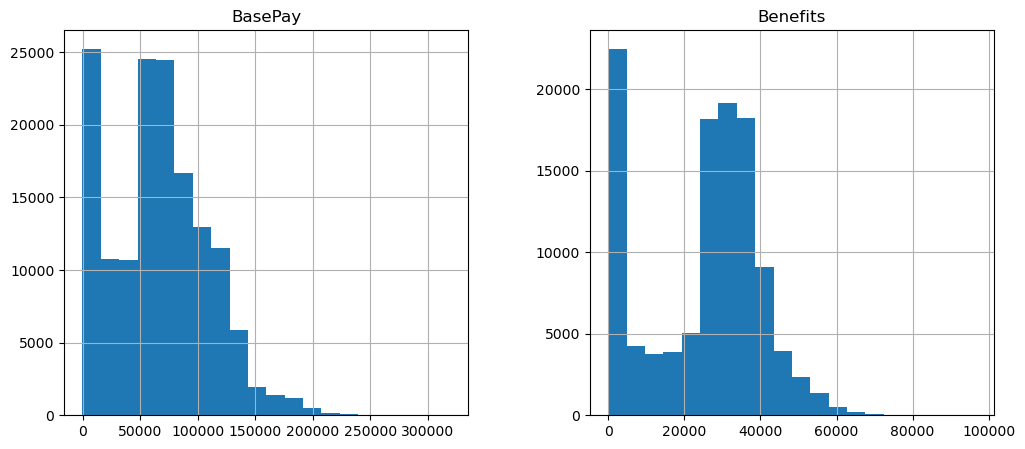

In [13]:
# Exploring the distribution of 'BasePay' and 'Benefits' columns with histograms

df[['BasePay', 'Benefits']].hist(bins=20, figsize=(12, 5))

# Displaying the histograms to visualize the distribution

plt.show()

In [14]:
# Further exploring the rows with missing values in the 'BasePay' column

df[df['BasePay'].isna()].head(10)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,San Francisco
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,San Francisco
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,San Francisco
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,San Francisco
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco
90811,90812,Edward M Harrington,Executive Contract Employee,NaN,0.0,105105.00,0.00,105105.00,105105.00,2013,San Francisco
91203,91204,Spencer J Gregory,Inspector 3,NaN,0.0,103727.48,0.00,103727.48,103727.48,2013,San Francisco
92260,92261,Derek Kerr,Senior Physician Specialist,NaN,0.0,100000.00,0.00,100000.00,100000.00,2013,San Francisco
97418,97419,Kevin M Martin,Police Officer 3,NaN,0.0,80687.72,0.00,80687.72,80687.72,2013,San Francisco
98573,98574,James M Blake,"Battalion Chief, Fire Suppress",NaN,0.0,74562.89,0.00,74562.89,74562.89,2013,San Francisco


>**Given that when 'BasePay' is NaN, 'OtherPay' is equal to 'TotalPay,' indicating that the base salary is effectively zero. Similarly, if 'Benefits' is NaN, it suggests there are no benefits, which is a valid scenario for some jobs.**

In [15]:
# Impute missing values in 'BasePay' with zero

df['BasePay'].fillna(0, inplace=True)

df['Benefits'].fillna(0, inplace=True)

In [16]:
# Further exploring the rows with missing values in the 'OvertimePay' column

df[df['OvertimePay'].isna()].head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


> **After exploring the rows with missing values in the 'OvertimePay' column, it was discovered that they contain no information about employees. As they do not contribute meaningful data, these rows will be dropped from the DataFrame.**

In [17]:
# Drop rows where 'OvertimePay' and 'OtherPay' are NaN

df.dropna(subset=['OvertimePay', 'OtherPay'], inplace=True)

In [18]:
# Checking for missing values after handling and dropping rows

df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## *Task 4*
####  Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

### Let's Assign a department to every Job Title

In [19]:
df['JobTitle'].value_counts().head(10)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: count, dtype: int64

In [20]:
# Initializing a default department and assigning specific departments based on job title keywords

df['Department'] = 'Other'

# Defining custom departments based on common keywords or phrases

departments = {
    'Transportation Department': ['Transit Operator', 'Driver', 'Transit'],
    'Police Department': ['Police', 'Deputy', 'Sheriff', 'Officer', 'Lieutenant', 'Trooper', 'Captain', 'Commander', 'Inspector'],
    'Security Department': ['Guard', 'Custodian', 'Protective', 'Support'],
    'Healthcare Department': ['Nurse', 'Doctor', 'Dr', 'Health', 'Medical', 'Patient', 'Nursery', 'Anaesthetist', 'Physician', 'Physical', 'Therapist', 'Nutritionist'],
    'Fire Department': ['Firefighter', 'Fire', 'Suppression', 'Battalion'],
    'Legal Department': ['Attorney', 'Eligibility', 'Legal', 'Court'],
    'Maintenance Department': ['Mech', 'Mechanic', 'Carpenter', 'Electrician'],
    'Engineering Department': ['Engineer', 'Eng', 'Technician', 'Engineering'],
    'Public Service Department': ['Public', 'Clerk', 'Svc', 'PS', 'Library', 'Gardener', 'Recreation', 'Worker', 'Librarian', 'Family', 'Svcs', 'Instructor', 'Preparator', 'Labourer'],
    'Administrative Department': ['Manager', 'Management', 'Head', 'Supervisor', 'Administrator', 'Supv'],
    'Analytics Department': ['Analyst', 'Tech', 'Research']
}

# Grouping job titles into departments based on the defined categories

for department, keywords in departments.items():
    mask = df['JobTitle'].str.contains('|'.join(keywords), case=False)
    df.loc[mask, 'Department'] = department

In [21]:
# Displaying the count of job titles assigned to each department

df['Department'].value_counts()

Department
Public Service Department    35473
Other                        24186
Healthcare Department        18985
Police Department            17350
Transportation Department    10046
Administrative Department     9215
Analytics Department          8855
Engineering Department        7442
Security Department           5964
Fire Department               5818
Legal Department              2726
Maintenance Department        2589
Name: count, dtype: int64

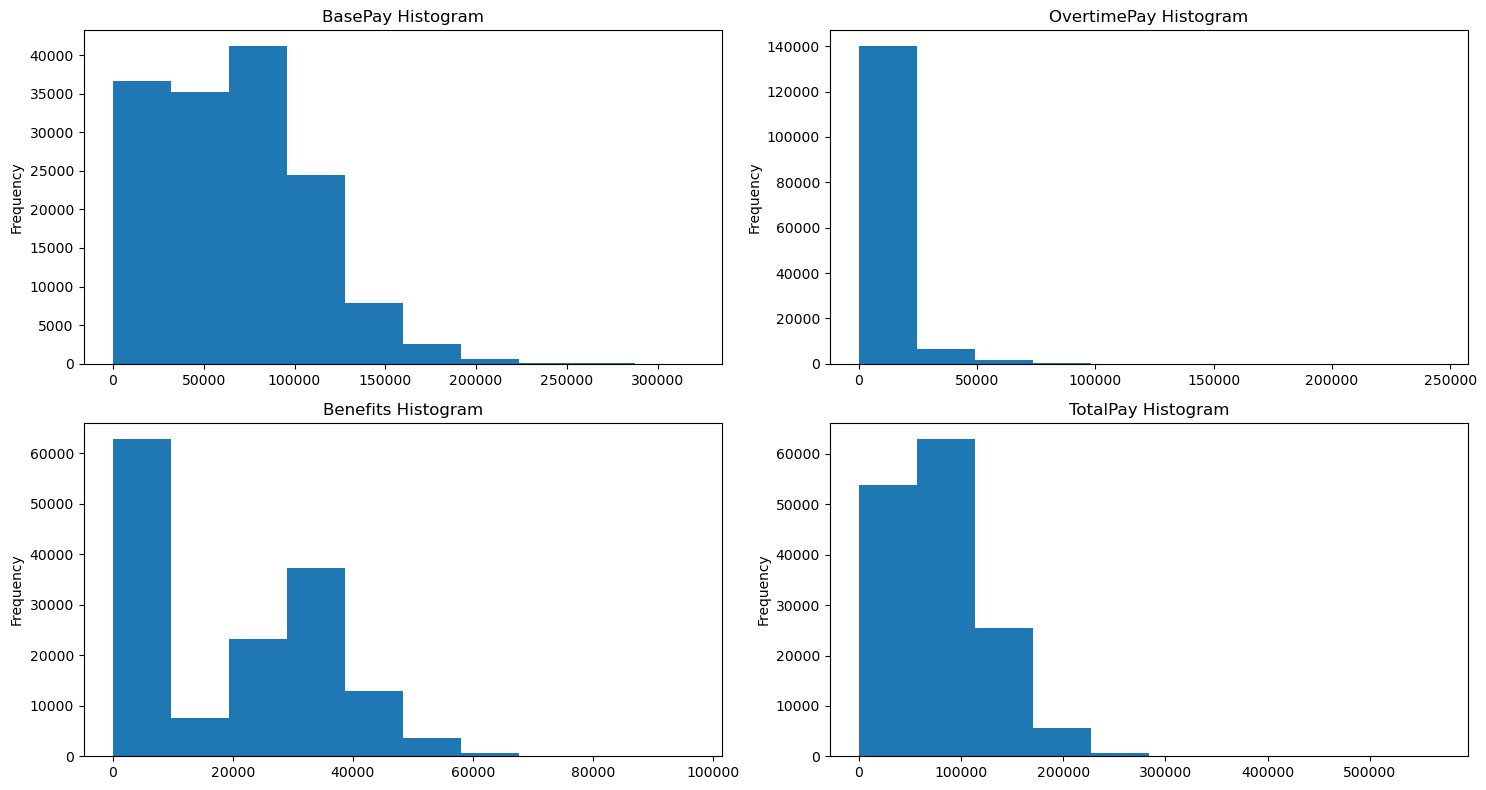

In [22]:
#let's explore the salaries columns

# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot histograms for each column
df['BasePay'].plot(kind='hist', ax=axes[0, 0], title='BasePay Histogram')
df['OvertimePay'].plot(kind='hist', ax=axes[0, 1], title='OvertimePay Histogram')
df['Benefits'].plot(kind='hist', ax=axes[1, 0], title='Benefits Histogram')
df['TotalPay'].plot(kind='hist', ax=axes[1, 1], title='TotalPay Histogram')

# Add a layout adjustment
plt.tight_layout()

# Show the plots
plt.show()

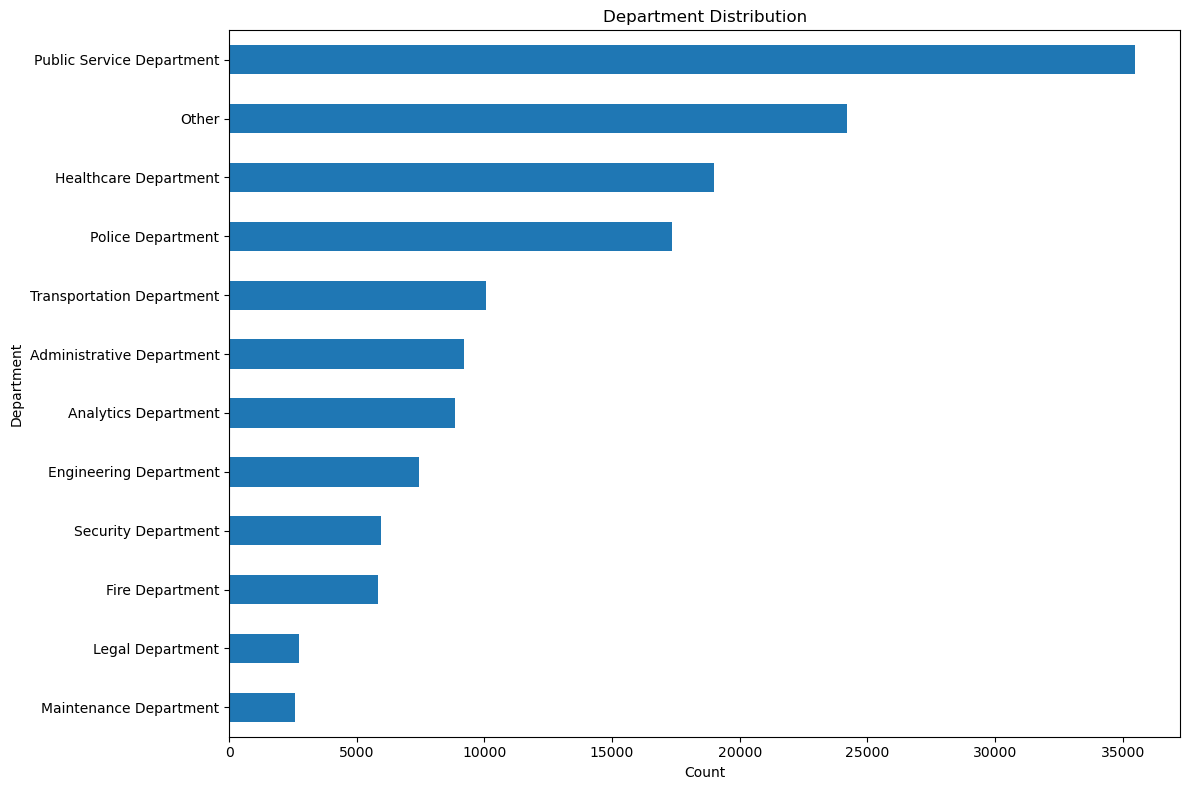

In [23]:
# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
df['Department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Department Distribution')
plt.xlabel('Count')
plt.ylabel('Department')

# Show the plot
plt.tight_layout()
plt.show()

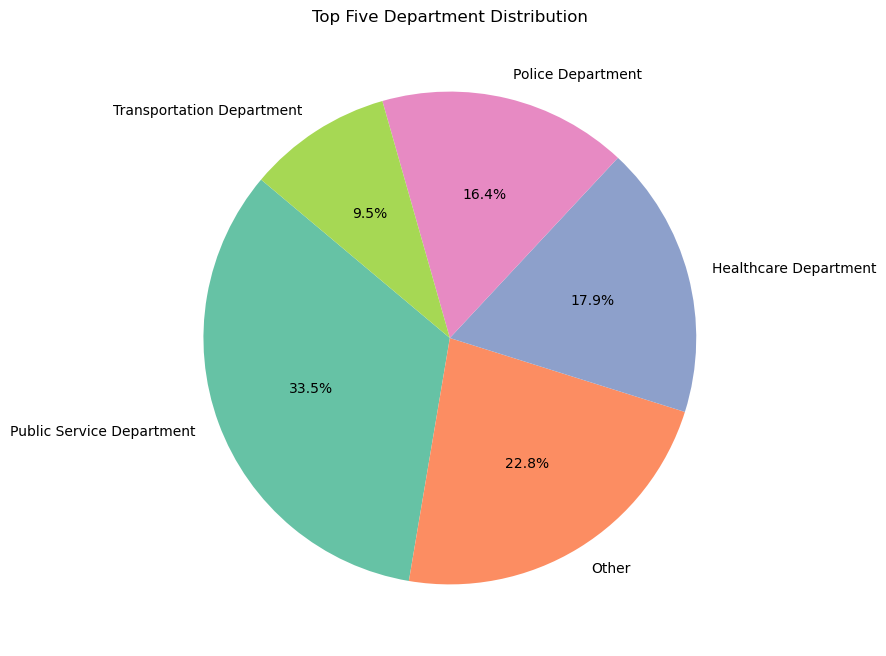

In [24]:
# Plotting the distribution of the top five departments using a pie chart

department_counts = df['Department'].value_counts().head()

# Plotting a pie chart with proportions

plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct=lambda p: '{:.1f}%'.format(p), startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top Five Department Distribution')

# Displaying the plot

plt.show()


## *Task 5*
#### Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [25]:
# Grouping the dataset by department and calculating summary statistics for 'BasePay' and 'TotalPay'

df.groupby('Department')[['BasePay', 'TotalPay']].agg(['max', 'min', 'mean', 'median'])

BasePay                                     \
                                 max     min           mean      median   
Department                                                                
Administrative Department  311758.96    0.00   99074.839818   95203.020   
Analytics Department       176039.20    0.00   73866.493933   76715.500   
Engineering Department     201705.50    0.00   81251.086122   85525.520   
Fire Department            313686.01    0.00  109388.215125  111640.530   
Healthcare Department      271831.50    0.00   62834.321765   59096.960   
Legal Department           252221.06    0.00  107803.803324  107848.400   
Maintenance Department     140942.56    0.00   72839.601645   79094.000   
Other                      318835.49    0.00   66811.923668   65858.505   
Police Department          319275.01    0.00   90142.201709   94896.815   
Public Service Department  305307.89 -166.01   39988.994918   44219.820   
Security Department        132182.59    0.00   36973.295880   45535.755   
Transportation Department  139689.50    0.00   51434.816675   62569.890   

                            TotalPay                                  
                                 max  min           mean      median  
Department                                                            
Administrative Department  567595.43  0.0  107254.369475  107008.030  
Analytics Department       336393.73  0.0   78039.519602   79724.520  
Engineering Department     241126.97  0.0   87375.959781   95230.405  
Fire Department            362844.66  0.0  151613.111519  153727.200  
Healthcare Department      322886.84  0.0   69682.620918   64570.150  
Legal Department           252221.06  0.0  110533.584021  112237.790  
Maintenance Department     332343.61  0.0   92198.765801   94249.070  
Other                      390111.98  0.0   73005.357941   71066.270  
Police Department          538909.28  0.0  107992.767195  112830.755  
Public Service Department  305307.89  0.0   42509.947159   46444.510  
Security Department        273164.65  0.0   40339.705444   49367.210  
Transportation Department  214221.36  0.0   64903.408976   72321.880

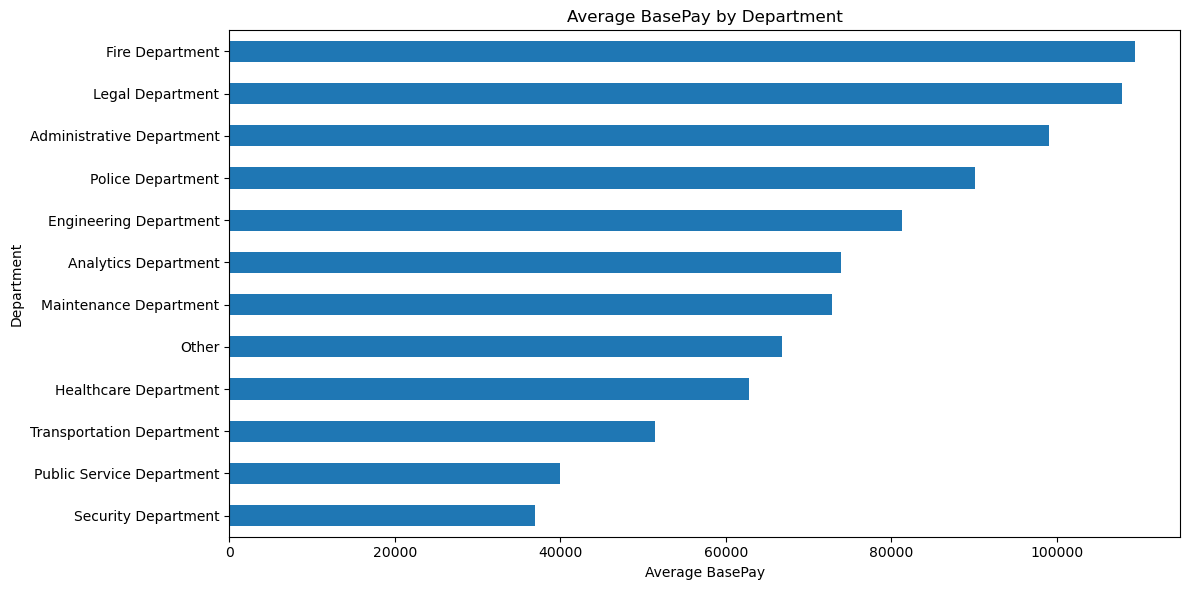

In [26]:
# Calculating the average 'BasePay' for each department and plotting a bar chart

average_basepay = df.groupby('Department')['BasePay'].mean()

# Plotting a horizontal bar chart

plt.figure(figsize=(12, 6))
average_basepay.sort_values().plot(kind='barh')
plt.title('Average BasePay by Department')
plt.xlabel('Average BasePay')
plt.ylabel('Department')

# Displaying the plot

plt.tight_layout()
plt.show()

## *Task 6*
#### Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

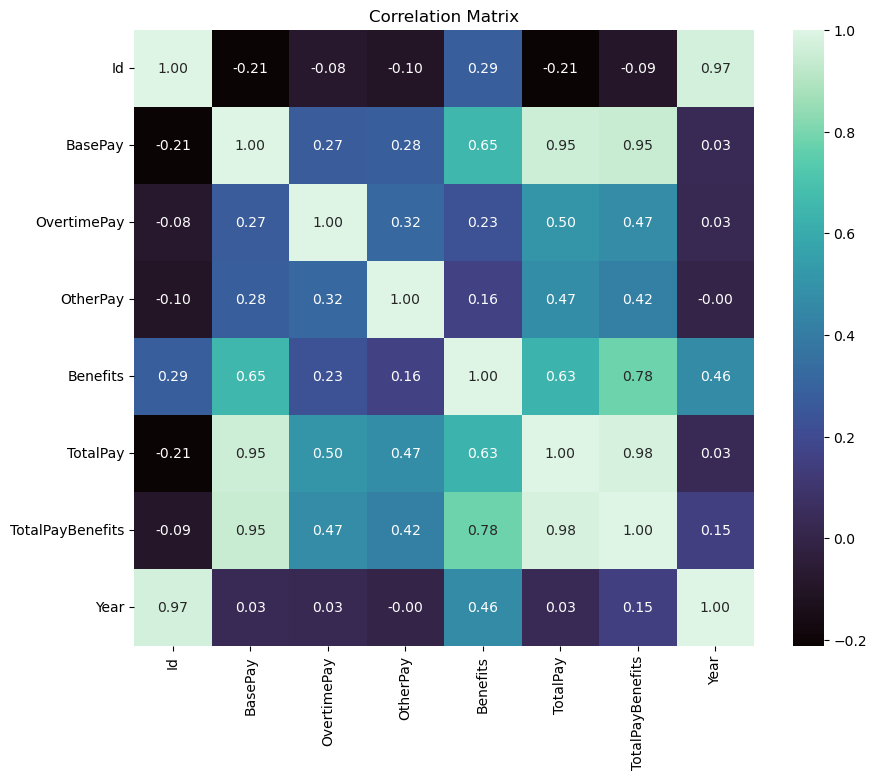

In [27]:
# Selecting numerical columns and calculating the correlation matrix

numerical_columns = df.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

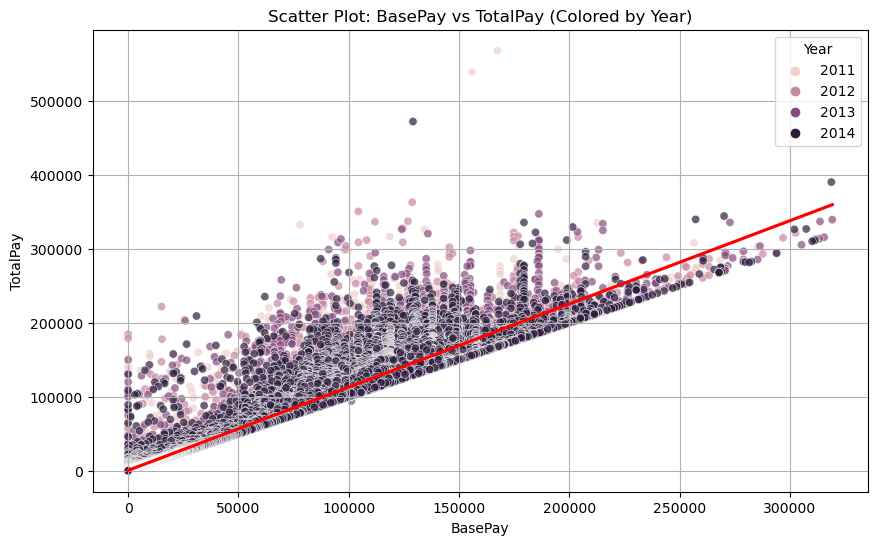

In [28]:
# Creating a scatter plot with regression line and using 'Year' as hue

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='BasePay', y='TotalPay', hue='Year', data=df, alpha=0.7)
sns.regplot(x='BasePay', y='TotalPay', data=df, scatter=False, ax=scatter_plot, color='red')
plt.title('Scatter Plot: BasePay vs TotalPay (Colored by Year)')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()


## *Task 7*
#### **Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.**

## Insights:
1. Job Title Variations:
   - The dataset contains numerous variations in job titles with typos, different cases, and abbreviations. Assigning departments based on job titles was challenging. Consider creating predefined categories when collecting data in the future for better consistency.

2. Departments with the highest average salary:
   - Fire Department and Legal Department have the highest average salary, followed by the Administrative Department.

3. TotalPay Mode and Zero Values:
   - The mode of the 'TotalPay' column is 0, indicating a significant number of entries with no recorded salary. Further analysis is needed to understand and address the presence of zero values, which may represent cases where no salary information is provided for certain jobs.

4. Redundant Column:
   - The 'Agency' column has only one unique value, making it redundant. Consider removing or consolidating this column for simplicity.


# Good Luck!